In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [4]:
data_water = pd.read_csv("./water_potability.csv")
data_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data_water["ph"]

0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

(array([  4.,  12.,  84., 353., 915., 898., 382., 116.,  17.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

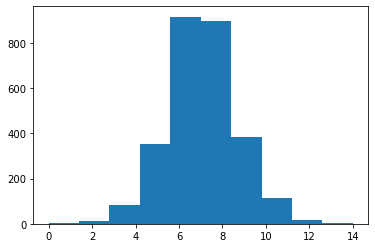

In [7]:
plt.hist(data_water["ph"])

In [9]:
data_water.groupby(['Potability']).mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


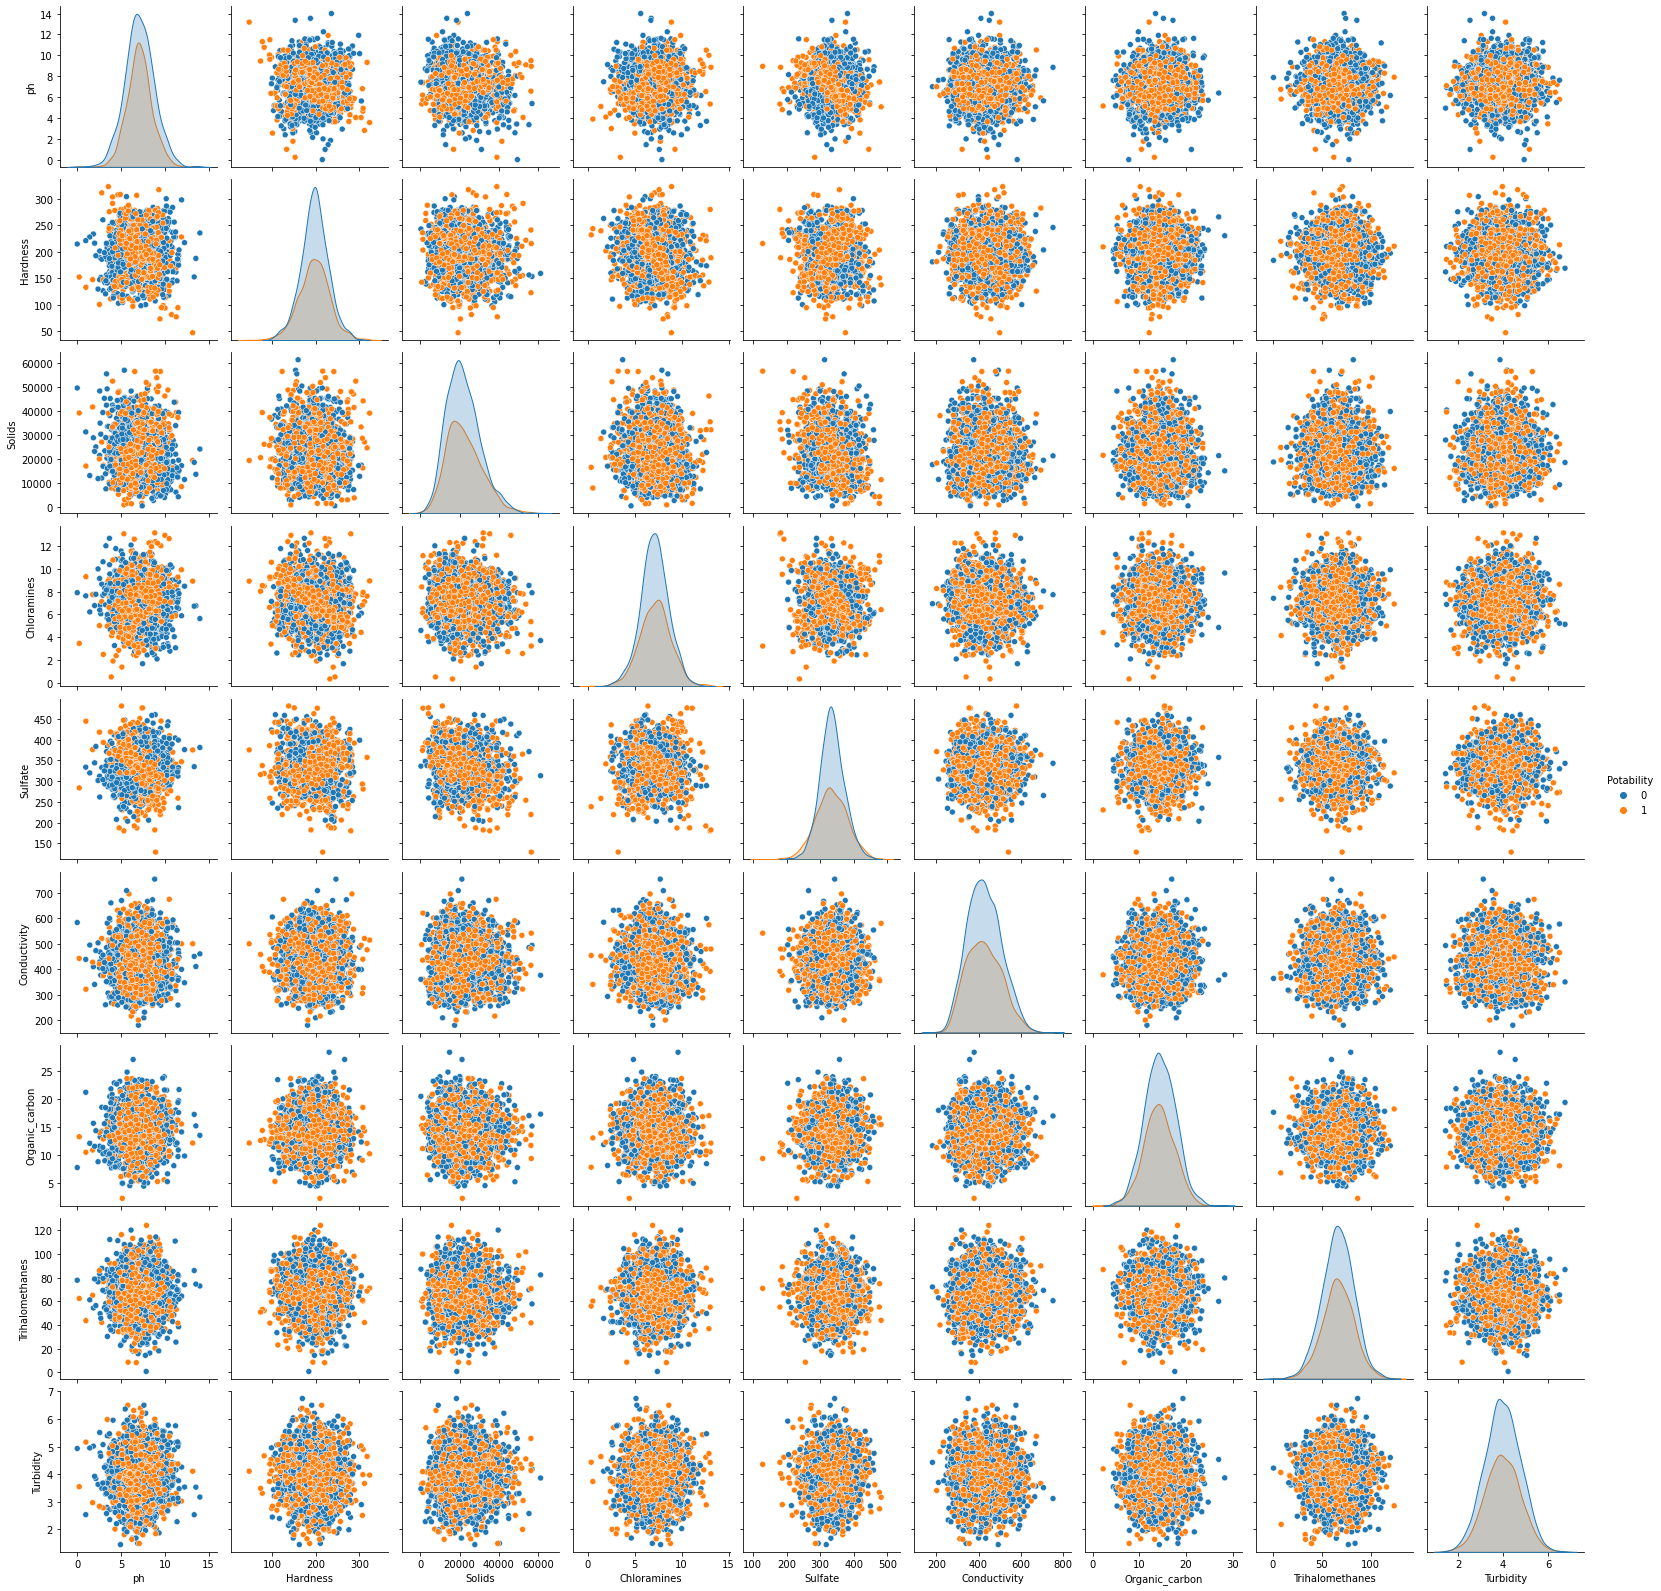

In [12]:
sns.pairplot(data_water, hue='Potability')

Ceci confirme bien le résultat retrouver avec le groupby ce qui prouve que les variable mise une à une ne sont pas assez claire pour différencier entre une eau potable et une eau non potable et par conséquent faudrait les utiliser toute

On va voir l'impact de la suppression des lignes ne contenant aucune données et voir si cela donne un bon résultat néanmoins

In [13]:
data_water.dropna(axis=0, inplace=True)

In [14]:
data_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [15]:
data_water.groupby(['Potability']).mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181
1,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254


La suppression des lignes n'a pas grandement impactée la distribution globale et donc c'était relativement un bon choix de supprimer alors ces lignes

On passe maintenant à la conception d'une série de modèle de classification pour parvenir à différencier une eau potable d'une eau non potable

In [18]:
etiq = data_water.drop(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], axis=1)
fv = data_water.drop(['Potability'], axis=1)

In [19]:
etiq.head()

,Potability
3,0
4,0
5,0
6,0
7,0


In [20]:
fv.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


Le dataframe divisé en deux on va maintenant procéder à la normalisation de chaque colonne pour nous permettre d'avoir des variables toutes dans le même intervalle 

In [28]:
fv["ph"] = (fv["ph"]-fv["ph"].mean())/(fv["ph"].max()-fv["ph"].min())

In [30]:
fv["Hardness"] = (fv["Hardness"]-fv["Hardness"].mean())/(fv["Hardness"].max()-fv["Hardness"].min())
fv["Solids"] = (fv["Solids"]-fv["Solids"].mean())/(fv["Solids"].max()-fv["Solids"].min())
fv["Chloramines"] = (fv["Chloramines"]-fv["Chloramines"].mean())/(fv["Chloramines"].max()-fv["Chloramines"].min())
fv["Sulfate"] = (fv["Sulfate"]-fv["Sulfate"].mean())/(fv["Sulfate"].max()-fv["Sulfate"].min())
fv["Conductivity"] = (fv["Conductivity"]-fv["Conductivity"].mean())/(fv["Conductivity"].max()-fv["Conductivity"].min())
fv["Organic_carbon"] = (fv["Organic_carbon"]-fv["Organic_carbon"].mean())/(fv["Organic_carbon"].max()-fv["Organic_carbon"].min())
fv["Trihalomethanes"] = (fv["Trihalomethanes"]-fv["Trihalomethanes"].mean())/(fv["Trihalomethanes"].max()-fv["Trihalomethanes"].min())
fv["Turbidity"] = (fv["Turbidity"]-fv["Turbidity"].mean())/(fv["Turbidity"].max()-fv["Turbidity"].min())

In [31]:
fv.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.089365,0.075479,0.001798,0.078816,0.067214,-0.114659,0.164424,0.294056,0.130639
4,0.145670,-0.060967,-0.070120,-0.050079,-0.065588,-0.050960,-0.112850,-0.298059,0.020882
5,-0.109051,-0.031392,0.121622,0.034980,-0.018596,-0.264732,-0.240176,-0.099486,-0.279503
6,0.227836,0.213675,0.121641,0.032299,0.171686,-0.258961,-0.022898,0.157704,-0.257048
7,0.112533,0.030320,-0.146799,-0.219095,-0.084978,0.087147,-0.080377,-0.031212,0.085573


In [32]:
fv.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03
mean,5.512884e-16,-1.043288e-15,7.497180e-17,1.049138e-15,-6.228994e-16,-1.985952e-16,-5.873251e-16,2.658548e-16,-7.588893e-16
std,1.142375e-01,1.338349e-01,1.538649e-01,1.350377e-01,1.170500e-01,1.462919e-01,1.340347e-01,1.392886e-01,1.546848e-01
min,-4.979844e-01,-5.022674e-01,-3.845001e-01,-4.893835e-01,-5.801332e-01,-4.076443e-01,-4.900977e-01,-5.009734e-01,-4.994756e-01
25%,-7.233736e-02,-7.883313e-02,-1.121957e-01,-8.481869e-02,-7.269867e-02,-1.084713e-01,-9.004035e-02,-9.052092e-02,-1.044281e-01
50%,-4.261606e-03,5.018612e-03,-1.751769e-02,8.152809e-04,-2.819341e-03,-5.565299e-03,-1.438746e-03,1.224528e-03,-3.075905e-04
75%,7.021085e-02,8.395876e-02,9.373969e-02,8.310983e-02,7.415798e-02,1.012225e-01,9.373836e-02,9.435786e-02,1.079234e-01
max,5.020156e-01,4.977326e-01,6.154999e-01,5.106165e-01,4.198668e-01,5.923557e-01,5.099023e-01,4.990266e-01,5.005244e-01


On subdivise notre dataset en deux datasets, d'entrainement et de test avec les proportions suivantes : 
- 70% seront pour la phase d'entrainement
- 30% seront pour la phase de test

In [33]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(fv, etiq, test_size=0.3,random_state=42) 
print("Le nombre d'échantillon d'entrainement = ",fv_train.shape)
print("Le nombre d'échantillon de test = ",fv_test.shape)

Le nombre d'échantillon d'entrainement =  (1407, 9)
Le nombre d'échantillon de test =  (604, 9)


On va utiliser plusieurs classifieurs : 
1) utilisant un KNN
2) Réseau de neurones entièrement connecté MLP
3) SVM avec différents Kernel
4) Random Forrest
#### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.6125827814569537, 0.6009933774834437, 0.5711920529801324, 0.6291390728476821, 0.6026490066225165, 0.6125827814569537, 0.6357615894039735, 0.6291390728476821, 0.6374172185430463, 0.6125827814569537, 0.6059602649006622, 0.6109271523178808, 0.6026490066225165, 0.6125827814569537, 0.6109271523178808]


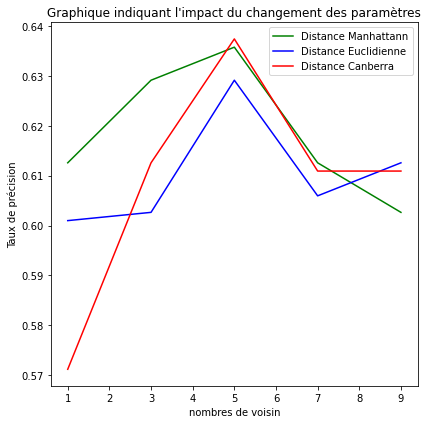

In [49]:
train_test = []
for k in range(1,10,2) :
    for i in range(1,4) : 
        knn = KNeighborsClassifier(n_neighbors = k, p = i).fit(fv_train,etiq_train)
        ypredict = knn.predict(fv_test)
        train_test.append(metrics.accuracy_score(etiq_test, ypredict))
print(train_test)
plt.figure(figsize=(6,6))
plt.plot(range(1,10,2),[train_test[0],train_test[3],train_test[6],train_test[9],train_test[12]],'g', label='Distance Manhattann')
plt.plot(range(1,10,2),[train_test[1],train_test[4],train_test[7],train_test[10],train_test[13]],'b', label='Distance Euclidienne')
plt.plot(range(1,10,2),[train_test[2],train_test[5],train_test[8],train_test[11],train_test[14]],'r', label='Distance Canberra')
plt.title("Graphique indiquant l'impact du changement des paramètres")
plt.legend(loc="upper right")
plt.ylabel("Taux de précision")
plt.xlabel("nombres de voisins")
plt.tight_layout()
plt.show()

On voit bien que l'algorithme des K-plus proches voisins n'est pas efficaces sur ce problème nous donnant au meilleur des cas une précision d'environ 64% ce qui est très peu, on va alors passer aux autres classifieur 
#### MLP

In [50]:
from sklearn.neural_network import MLPClassifier

In [90]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter = 1000 , hidden_layer_sizes=(15,25, 50, 35, 15), random_state=1).fit(fv_train,etiq_train)
ymlp = mlp.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, mlp.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ymlp))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Taux de précision lors de l'entrainement :  0.7761194029850746
Taux de précision lors des tests :  0.6605960264900662


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


On voit bien qu'avec un réseau de Neurones on a des résultats légèrement meilleur mais on reste sur des résultats assez bas d'environ 67% en test
#### SVM

In [91]:
from sklearn.svm import SVC

In [139]:
svm = SVC(gamma='scale', kernel='poly', degree=4).fit(fv_train,etiq_train)
ysvm = svm.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, svm.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ysvm))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Taux de précision lors de l'entrainement :  0.7555081734186212
Taux de précision lors des tests :  0.6655629139072847


On utilisant un SVC on a dans ce problème environ 67 à 69% de précision sur l'ensemble de test ce qui en fait pour l'instant le meilleur classifieur. On va tester maintenant le nuSVC
#### NuSVC

In [140]:
from sklearn.svm import NuSVC

In [174]:
nusvm = NuSVC(nu = 0.6, kernel='poly', degree=4, coef0 = 2, decision_function_shape='ovr').fit(fv_train,etiq_train)
ynusvm = nusvm.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, nusvm.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ynusvm))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Taux de précision lors de l'entrainement :  0.7739872068230277
Taux de précision lors des tests :  0.6771523178807947


On a aussi environ 68% de précision et donc les résultats pour les deux méthodes SVM sont quasiment les mêmes